In [1]:
#Multiple Linear Regression using the same dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics

In [2]:
# 1. Load Diabetes Dataset

diabetes = datasets.load_diabetes(return_X_y=False, as_frame=True, scaled=False)
# as_frames=True -> returns it as DataFrame instead of Array 
# return_X_y=False -> returns it as a structured object (with metadata, which also contains data as separate field) instead of tuple.count
diabetes.DESCR


'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [3]:
# convert dataset to usable formats. (data-features & target-prediction) (revise- feature vs sample.)

df_diabetes = diabetes.data # As `as_frames` is true, we don't have to convert the data into dataframe.
df_diabetes['target'] = diabetes.target # `data is nothing but "features" and `target` is output value. (last column)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [4]:
df_diabetes.to_csv('diabetes_dataset.csv', index=False)

In [5]:
# 2. Linear Regression (using "bmi" as feature, predict the "target" value)
X = df_diabetes.drop(columns=['target'])  # Use all features for multiple linear regression
y = df_diabetes['target'] #target is a series.(represents one output)

In [6]:
# plotting the current graph
# plt.scatter(X, y, color='blue', label='Actual')
# plt.xlabel('BMI')
# plt.ylabel('Target')
# plt.title('Actual BMI vs Target')
# plt.legend()
# plt.show()

In [7]:
# The Training:
# model->fit values->predict values->find errors

model = linear_model.LinearRegression()

#Fit the models with bmi and the actual values
model.fit(X, y)

#Now, call Predict function with only values of BMI
y_pred = model.predict(X)

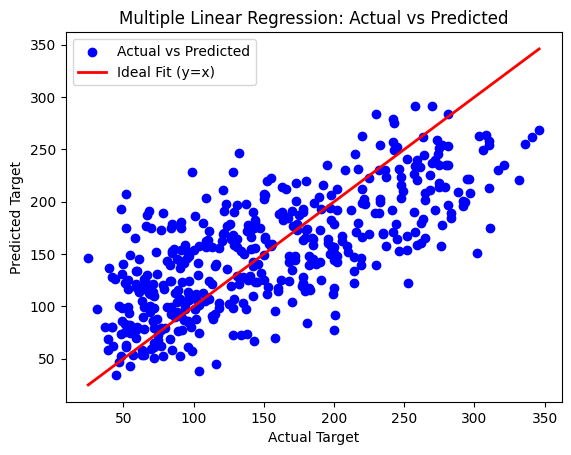

In [8]:

# Plotting the results
# plt.scatter(X, y, color='blue', label='Actual')
# plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted')
# plt.xlabel('BMI')
# plt.ylabel('Target')
# plt.title('Simple Linear Regression: BMI vs Target')
# plt.legend()
# plt.show()

plt.scatter(y, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal Fit (y=x)')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()


In [15]:
# 3. Print the Metrics:

#r2_score
metrics.r2_score(y, y_pred)

#mse

metrics.mean_squared_error(y, y_pred)

2859.6963475867506